In [4]:
import sqlite3
import re
import pandas as pd
import numpy as np

## Clean up subject

In [234]:
# conn = sqlite3.connect('../hillary-clinton-emails/database.sqlite')
# cur = conn.cursor()
# cur.execute('pragma table_info(Emails)')
# f_1 = 'Id'
# f_2 = 'MetadataTo'
# f_3 = 'MetadataFrom'
# f_4 = 'ExtractedSubject'
# f_5 = 'ExtractedDateSent'
# f_6 = 'ExtractedBodyText'
# f_7 = 'RawText'
# cur.execute('select {c1},{c2},{c3},{c4},{c5},{c6},{c7} from Emails'.\
#             format(c1=f_1,c2=f_2,c3=f_3,c4=f_4,c5=f_5,c6=f_6,c7=f_7))
# cur.fetchall()
# cur.fetchone()
# columns_less = ['id','to','from','sub','date','body','raw']
# columns = [str(tpl[1]) for tpl in columns]
def clean_subject(sub):
    email_type = None
    if re.match('^[Ff][Ww]',sub)!=None:
        email_type='fw'
        sub = re.sub('^[Ff][Ww].*:\s*(.+)',r'\1',sub)
    elif re.match('^[Rr][Ee]:',sub)!=None:
        email_type='re'
        sub = re.sub('^[Rr][Ee]:\s*(.+)',r'\1',sub)
    elif re.match('^[Ff][Vv][Vv]:',sub)!=None:
        email_type='fvv'
        sub = re.sub('^[Ff][Vv][Vv]:\s*(.+)',r'\1',sub)
    return email_type,sub

In [245]:
conn = sqlite3.connect('../hillary-clinton-emails/database.sqlite')
sql = """select e.Id, p.Name Sender, e.SenderPersonId Sender_Id
, e.MetadataTo Receiver, a.PersonId Receiver_Id, e.ExtractedDateSent, e.ExtractedSubject
from Emails e 
inner join Persons p on e.SenderPersonId=p.Id 
left outer join Aliases a on lower(e.MetadataTo)=a.Alias
"""
emails = pd.read_sql_query(sql,conn)
temp = emails.ExtractedSubject.apply(clean_subject)
emails['ExtractedSubject'] = [tpl[1] for tpl in temp]
emails['email_type'] = email_type = [tpl[0] for tpl in temp]
emails.head(20)

,Id,Sender,Sender_Id,Receiver,Receiver_Id,ExtractedDateSent,ExtractedSubject,email_type
0,1,Jake Sullivan,87,H,80.0,"Wednesday, September 12, 2012 10:16 AM",Wow,fw
1,3,Cheryl Mills,32,;H,NaN,"Wednesday, September 12, 2012 11:52 AM",Chris Stevens,re
2,4,Cheryl Mills,32,H,80.0,"Wednesday, September 12,2012 12:44 PM",Cairo Condemnation - Final,fvv
3,5,Hillary Clinton,80,"Abedin, Huma",NaN,,,None
4,6,Hillary Clinton,80,Russorv@state.gov,185.0,"Wednesday, September 12, 2012 01:00 PM",Meet The Right Wing Extremist Behind Anti-Musl...,None
5,7,Cheryl Mills,32,H,80.0,"Wednesday, September 12, 2012 4:00 PM","Anti-Muslim film director in hiding, following...",fw
6,8,Hillary Clinton,80,"Abedin, Huma",NaN,,,None
7,9,Jake Sullivan,87,H,80.0,"Wednesday, September 12, 2012 6:08 PM",Secretary's remarks,fvv
8,11,Jake Sullivan,87,H,80.0,"Sunday, March 13, 2011 10:55 AM",AbZ and Hb3 on Libya and West Bank/Gaza,None
9,13,Jake Sullivan,87,H,80.0,"Wednesday, September 12 2012 700 PM",hey,None


## Clean-up sender receiver

In [246]:
# Fetch data in pandas dataframe
conn = sqlite3.connect('../hillary-clinton-emails/database.sqlite')
# sql = "select * from Emails"
# emails = pd.read_sql_query(sql,conn)
# columns = ['Id','SenderPersonId','MetadataFrom','MetadataTo','ExtractedDateSent','ExtractedSubject','ExtractedBodyText']
# emails[columns].head(5)
# emails[emails['SenderPersonId']==80][columns].head(5)
# x = emails.groupby('SenderPersonId').size()
# print 'No of mails sent by HC =',x[80]

# Assign receiver Id
sql = """select e.Id, p.Name Sender, 
e.SenderPersonId Sender_Id, e.MetadataTo Receiver, a.PersonId Receiver_Id, e.ExtractedDateSent
from Emails e 
inner join Persons p on e.SenderPersonId=p.Id 
left outer join Aliases a on lower(e.MetadataTo)=a.Alias
"""
emails = pd.read_sql_query(sql,conn)
# emails_noNA = emails.dropna(how='any')
# emails.head(20)
idx_NaN = [i for i,val in enumerate(emails['Receiver_Id']) if np.isnan(val)]


# Create dictionary personId:name
sql = "select * from Persons"
persons = pd.read_sql_query(sql,conn)
persons_dict = {}
for entry in persons.itertuples():
    persons_dict[entry[2]]=entry[1]
    
# Fill up missing Receiver_Id fields
receiver_dict = {}
pattern = re.compile('^(\w+),\sp*(\w+)')
for idx in idx_NaN:
    name = emails['Receiver'][idx]
    pat_obj = pattern.match(name)
    if pat_obj!=None:
        person_name = pat_obj.group(2)+' '+pat_obj.group(1)
        try:
            person_id = persons_dict[person_name]
            emails['Receiver_Id'][idx]=person_id
        except:
            pass
temp = emails.shape[0]
emails = emails.dropna(how='any')
print 'Discarded emails: ',temp-emails.shape[0]

emails.head(20)

/home/debojyoti/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Discarded emails:  174


,Id,Sender,Sender_Id,Receiver,Receiver_Id,ExtractedDateSent
0,1,Jake Sullivan,87,H,80.0,"Wednesday, September 12, 2012 10:16 AM"
2,4,Cheryl Mills,32,H,80.0,"Wednesday, September 12,2012 12:44 PM"
3,5,Hillary Clinton,80,"Abedin, Huma",81.0,
4,6,Hillary Clinton,80,Russorv@state.gov,185.0,"Wednesday, September 12, 2012 01:00 PM"
5,7,Cheryl Mills,32,H,80.0,"Wednesday, September 12, 2012 4:00 PM"
6,8,Hillary Clinton,80,"Abedin, Huma",81.0,
7,9,Jake Sullivan,87,H,80.0,"Wednesday, September 12, 2012 6:08 PM"
8,11,Jake Sullivan,87,H,80.0,"Sunday, March 13, 2011 10:55 AM"
9,13,Jake Sullivan,87,H,80.0,"Wednesday, September 12 2012 700 PM"
10,14,Anne-Marie Slaughter,10,H,80.0,


## Clean up date

In [6]:
# txt = 'Thursday, September 30, 2010 9:04 PM'
# txt = 'Thu Sep 17 06:03:43 2009'
def clean_date_aux(ts):
    pat = re.compile('\'?(?P<weekday>\w+),?\s*(?P<month>\w+) (?P<date>\d+),?\s*(?P<year>\d+) (?P<time>.+) (?P<ampm>[A|P]M)')
    pat1 = re.compile('(?P<weekday>.+) (?P<month>.+) (?P<date>.+) (?P<time>.+) (?P<year>.+)')
    if ts=='':
        return np.NAN
    re_obj = None
    try:
        if pat.match(ts)!=None:
            re_obj = pat.match(ts)
        elif pat1.match(ts)!=None:
            re_obj = pat1.match(ts)
        else:
            raise
        # Process date
        month = re_obj.group('month')
        day = re_obj.group('date')
        year = re_obj.group('year')
        time = re_obj.group('time').replace('.',':')
        # Check for numeric value of day and year
        try:
            month = month[:3]
            day = int(day)
            year = int(year)
        except:
            raise
        # Check time string
        if ':' not in time and len(time)>2:
            time = time[:-2]+':'+time[-2:]
        try:
            time = time + ' ' + re_obj.group('ampm')
        except:
            pass
        ts_str = "{} {} {} {}".format(month,day,year,time)
        try:
            pd_ts = pd.to_datetime(ts_str)
            return pd_ts
        except:
            raise
    except:
        return np.NAN

In [7]:
def clean_date(raw_date):
    return clean_date_aux(raw_date)
emails['Date']=emails.ExtractedDateSent.apply(clean_date)
emails.head(10)
# emails = emails.dropna(how='any')
emails.index = emails.Date
emails.sort_index(inplace=True)
mindate,maxdate = emails.index.min(),emails.index.max()
"Date Range from {} to {}".format(mindate.date(),maxdate.date())
emails[:'2011-01'].Id.count()

6306

## Process email body: Topic modelling

In [41]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim
import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore

In [80]:
class HillaryEmails(object):
    def __init__(self,doc_vectors):
        self.doc_vectors = doc_vectors
    def __iter__(self):
        for vector in self.doc_vectors:
            yield vector

In [82]:
def tokenize(text):
    text = text.replace("\n"," ")
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]
def do_BoW(tokens):
    return vocab.doc2bow(tokens)
def get_maxwords(vector):
    minimum = int(len(vector)*0.2)
    minimum = min(10,minimum)
    global vocab
    temp = sorted(vector,key=lambda x:x[1],reverse=True)
    topic = [vocab[it[0]] for it in temp[:minimum]]
    return topic
conn = sqlite3.connect('../hillary-clinton-emails/database.sqlite')
sql = """select e.Id, p.Name Sender, 
e.SenderPersonId Sender_Id, e.ExtractedDateSent, e.ExtractedBodyText
from Emails e 
inner join Persons p on e.SenderPersonId=p.Id
"""
emails = pd.read_sql_query(sql,conn)
emails['ExtractedDateSent']=emails.ExtractedDateSent.apply(clean_date)
# Step 1: Mails from Hillary
emails = emails[emails['Sender_Id']==80]
# Step 2: Tokenize email body
email_tokens = emails.ExtractedBodyText.apply(tokenize)
doc_stream = [tokens for tokens in email_tokens]
print len(doc_stream)
# Step 3: Build Vocabulary
%time vocab = gensim.corpora.Dictionary(doc_stream)
    # print vocab.items()
    # vocab.filter_extremes(no_below=20,no_above=0.8)
    # vocab.filter_extremes(no_above=0.5)
# Step 4: Run BoW on docs
vectors_doc = email_tokens.apply(do_BoW)
maxwords = vectors_doc.apply(get_maxwords)
#Step 5: save doc vectors in mm file
hillary_emails_corpus = HillaryEmails(vectors_doc)
%time gensim.corpora.MmCorpus.serialize('emails_bow.mm',hillary_emails_corpus)

INFO : adding document #0 to Dictionary(0 unique tokens: [])
INFO : built Dictionary(4249 unique tokens: [u'voluble', u'secondly', u'ams', u'marketwire', u'cretz']...) from 1993 documents (total 17317 corpus positions)
INFO : storing corpus in Matrix Market format to emails_bow.mm
INFO : saving sparse matrix to emails_bow.mm
INFO : PROGRESS: saving document #0


1993
CPU times: user 64 ms, sys: 12 ms, total: 76 ms
Wall time: 64.8 ms


INFO : PROGRESS: saving document #1000
INFO : saved 1993x4249 matrix, density=0.187% (15844/8468257)
INFO : saving MmCorpus index to emails_bow.mm.index


CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 177 ms


In [86]:
hillary_mm_corpus = gensim.corpora.MmCorpus('emails_bow.mm')
print hillary_mm_corpus
clipped_corpus = gensim.utils.ClippedCorpus(hillary_emails_corpus,1600)
%time lda_model = gensim.models.LdaModel(clipped_corpus, num_topics=20, id2word=vocab, passes=4)

INFO : loaded corpus index from emails_bow.mm.index
INFO : initializing corpus reader from emails_bow.mm
INFO : accepted corpus with 1993 documents, 4249 features, 15844 non-zero entries
INFO : using symmetric alpha at 0.05
INFO : using symmetric eta at 0.05
INFO : using serial LDA version on this node


MmCorpus(1993 documents, 4249 features, 15844 non-zero entries)


INFO : running online LDA training, 20 topics, 4 passes over the supplied corpus of 1600 documents, updating model once every 1600 documents, evaluating perplexity every 1600 documents, iterating 50x with a convergence threshold of 0.001000
INFO : -20.091 per-word bound, 1116804.3 perplexity estimate based on a held-out corpus of 1600 documents with 14746 words
INFO : PROGRESS: pass 0, at document #1600/1600
INFO : topic #15 (0.050): 0.016*thx + 0.016*state + 0.013*com + 0.012*gov + 0.011*hrod + 0.010*clintonemail + 0.008*best + 0.008*pm + 0.006*tomorrow + 0.006*forward
INFO : topic #9 (0.050): 0.022*pls + 0.016*print + 0.014*time + 0.013*state + 0.010*thx + 0.009*pm + 0.008*house + 0.007*help + 0.007*thank + 0.007*like
INFO : topic #18 (0.050): 0.017*pis + 0.013*thx + 0.011*print + 0.007*need + 0.006*help + 0.005*tomorrow + 0.005*sure + 0.005*know + 0.005*think + 0.005*tom
INFO : topic #6 (0.050): 0.016*pis + 0.008*thx + 0.007*soon + 0.007*hope + 0.006*ok + 0.006*want + 0.006*know + 0

CPU times: user 30.8 s, sys: 228 ms, total: 31.1 s
Wall time: 24.1 s


In [88]:
lda_model.print_topics(-1)

INFO : topic #0 (0.050): 0.038*yes + 0.019*release + 0.018*like + 0.009*com + 0.009*hrod + 0.009*clintonemail + 0.009*state + 0.008*follow + 0.006*sunday + 0.006*kudos
INFO : topic #1 (0.050): 0.010*parlak + 0.009*state + 0.008*need + 0.007*thx + 0.007*com + 0.007*let + 0.007*diplomacy + 0.006*gov + 0.006*immigration + 0.005*know
INFO : topic #2 (0.050): 0.014*pls + 0.011*coming + 0.011*thx + 0.010*know + 0.009*print + 0.008*fax + 0.008*want + 0.008*home + 0.007*huma + 0.006*email
INFO : topic #3 (0.050): 0.022*send + 0.014*thx + 0.014*work + 0.012*pls + 0.012*time + 0.011*want + 0.010*let + 0.009*like + 0.009*know + 0.008*told
INFO : topic #4 (0.050): 0.014*need + 0.013*time + 0.010*know + 0.009*hrod + 0.008*thx + 0.008*ok + 0.007*com + 0.007*think + 0.007*decision + 0.007*pm
INFO : topic #5 (0.050): 0.011*later + 0.010*discuss + 0.009*leave + 0.009*speech + 0.008*pis + 0.008*let + 0.008*tell + 0.008*fine + 0.008*email + 0.006*today
INFO : topic #6 (0.050): 0.016*pis + 0.016*email + 0

[(0,
  u'0.038*yes + 0.019*release + 0.018*like + 0.009*com + 0.009*hrod + 0.009*clintonemail + 0.009*state + 0.008*follow + 0.006*sunday + 0.006*kudos'),
 (1,
  u'0.010*parlak + 0.009*state + 0.008*need + 0.007*thx + 0.007*com + 0.007*let + 0.007*diplomacy + 0.006*gov + 0.006*immigration + 0.005*know'),
 (2,
  u'0.014*pls + 0.011*coming + 0.011*thx + 0.010*know + 0.009*print + 0.008*fax + 0.008*want + 0.008*home + 0.007*huma + 0.006*email'),
 (3,
  u'0.022*send + 0.014*thx + 0.014*work + 0.012*pls + 0.012*time + 0.011*want + 0.010*let + 0.009*like + 0.009*know + 0.008*told'),
 (4,
  u'0.014*need + 0.013*time + 0.010*know + 0.009*hrod + 0.008*thx + 0.008*ok + 0.007*com + 0.007*think + 0.007*decision + 0.007*pm'),
 (5,
  u'0.011*later + 0.010*discuss + 0.009*leave + 0.009*speech + 0.008*pis + 0.008*let + 0.008*tell + 0.008*fine + 0.008*email + 0.006*today'),
 (6,
  u'0.016*pis + 0.016*email + 0.013*agree + 0.010*info + 0.009*thx + 0.009*soon + 0.008*hope + 0.007*want + 0.006*joe + 0.006

In [90]:
%time tfidf_model = gensim.models.TfidfModel(hillary_mm_corpus, id2word=vocab)
%time lsi_model = gensim.models.LsiModel(tfidf_model[hillary_mm_corpus], id2word=vocab, num_topics=200)

INFO : collecting document frequencies
INFO : PROGRESS: processing document #0
INFO : calculating IDF weights for 1993 documents and 4248 features (15844 matrix non-zeros)
INFO : using serial LSI version on this node
INFO : updating model with new documents


CPU times: user 204 ms, sys: 12 ms, total: 216 ms
Wall time: 210 ms


INFO : preparing a new chunk of documents
INFO : using 100 extra samples and 2 power iterations
INFO : 1st phase: constructing (4249, 300) action matrix
INFO : orthonormalizing (4249, 300) action matrix
INFO : 2nd phase: running dense svd on (300, 1993) matrix
INFO : computing the final decomposition
INFO : keeping 200 factors (discarding 12.508% of energy spectrum)
INFO : processed documents up to #1993
INFO : topic #0(9.460): 0.995*"ok" + 0.074*"thx" + 0.033*"pls" + 0.024*"print" + 0.017*"talk" + 0.010*"dc" + 0.009*"pis" + 0.008*"let" + 0.008*"clintonemail" + 0.008*"tomorrow"
INFO : topic #1(8.125): -0.787*"print" + -0.530*"pls" + -0.268*"pis" + -0.049*"gov" + -0.047*"state" + 0.045*"ok" + -0.044*"hrod" + -0.044*"clintonemail" + -0.043*"copies" + -0.043*"com"
INFO : topic #2(5.791): 0.869*"thx" + 0.144*"state" + 0.143*"gov" + 0.139*"hrod" + 0.139*"clintonemail" + 0.138*"com" + 0.109*"pm" + 0.098*"yes" + -0.096*"print" + 0.085*"talk"
INFO : topic #3(5.447): 0.429*"thx" + -0.337*"gov" 

CPU times: user 1.6 s, sys: 28 ms, total: 1.63 s
Wall time: 1.39 s


## Running R from python

In [34]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
base = importr('base')
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

rpy2.rinterface.NULL

In [35]:
packnames = ['ggplot2']
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install)>0:
    utils.install_packages(StrVector(names_to_install))

## Sentiment Analysis on countries

In [2]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [103]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
n_instances = 100
subj_docs = [(sent,'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent,'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
# subj_docs[10],obj_docs[1]
train_docs = subj_docs[:80]+obj_docs[:80]
test_docs = subj_docs[80:100]+obj_docs[80:100]
senti_analyser = SentimentAnalyzer()

function

In [2]:
sent = "He is a murderer"
sentiAnalyser = SentimentIntensityAnalyzer()
sentiAnalyser.polarity_scores(sent)

{'compound': -0.6808, 'neg': 0.697, 'neu': 0.303, 'pos': 0.0}

## Find sentiment of emails

In [8]:
def getSentiment(text):
    pos = 0
    neg = 0
    neu = 0
    if text=='':
        return 0,pos,neg
    global sentiAnalyser
    text = text.replace('\n',' ')
    sentences = sent_tokenize(text)
    sentences = [sent for sent in sentences if len(sent.split())>2]
    for sent in sentences:
        senti = sentiAnalyser.polarity_scores(sent)
        if senti['neu']>=0.9:
            neu += 1
        else:
            pos += senti['pos']
            neg += senti['neg']
    count = len(sentences)-neu
    if count == 0:
        return len(sentences),pos,neg
    return len(sentences),pos/count,neg/count
conn = sqlite3.connect('../hillary-clinton-emails/database.sqlite')
sql = """select e.Id, p.Name Sender, 
e.SenderPersonId Sender_Id, e.ExtractedDateSent, e.ExtractedBodyText
from Emails e 
inner join Persons p on e.SenderPersonId=p.Id
"""
emails = pd.read_sql_query(sql,conn)
emails['ExtractedDateSent']=emails.ExtractedDateSent.apply(clean_date)
# Step 1: Mails from Hillary
emails = emails[emails['Sender_Id']==80]
# emails = emails.head(5)
# emails.ExtractedBodyText.apply(getSentiment)
print 'Total Email count by Hillary: ',emails.Id.count()
sentiAnalyser = SentimentIntensityAnalyzer()
%time sentiments = emails.ExtractedBodyText.apply(getSentiment)
senti_map = zip(emails.Id.values,sentiments.values)
senti_map = sorted(senti_map,key = lambda(item):item[1][2],reverse=True)
print senti_map[:5]

Total Email count by Hillary:  1993
CPU times: user 1.24 s, sys: 20 ms, total: 1.26 s
Wall time: 1.24 s
[(552, (7, 0.0, 0.772)), (2240, (1, 0.0, 0.7)), (585, (3, 0.0, 0.531)), (1022, (2, 0.0, 0.508)), (2308, (1, 0.0, 0.483))]


## Find occurance of country name in mails

In [10]:
import pycountry

In [11]:
def get_count(text):
    global country_counter
    global countries_new_name
    for indx,country in enumerate(pycountry.countries):
        name = country.name
        if name in countries_new_name.keys():
            name = countries_new_name[name]
        name = '\\b'+name # Ensuring substring start with country name. eg.Indian, Syrian, India
        all_matches = re.finditer(name,text,re.IGNORECASE)
        n_occurrences = len(list(all_matches))
        country_counter[indx] += n_occurrences
country_counter = [0 for country in pycountry.countries]
country_names = [country.name for country in pycountry.countries]
countries_new_name = {'Syrian Arab Republic':'Syria','Russian Federation':'Russia','Iran, Islamic Republic of':\
                      'Iran','Korea, Democratic People\'s Republic of':'Korea','Palestine, State of':'Palestine',\
                      'Venezuela, Bolivarian Republic of':'Venezuela'}
emails.ExtractedBodyText.apply(get_count)
# let's study count for some countries
country2ind = {}
for indx,country in enumerate(pycountry.countries):
    country2ind[country.name]=indx
country_name_count = zip(country_names,country_counter)
country_name_count = sorted(country_name_count,key = lambda(item):item[1],reverse=True)

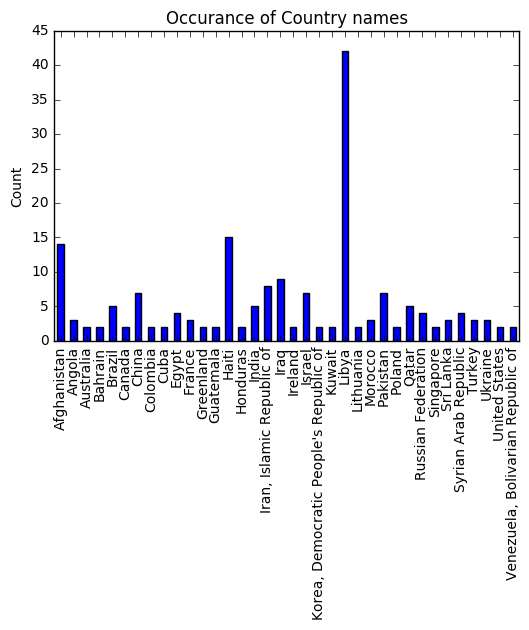

In [27]:
%matplotlib inline
df = pd.DataFrame(np.array(country_counter),country_names)
df = df[df[0]>1]
ax = df.plot(kind='bar',legend=False,title='Occurance of Country names')
ax.set_ylabel('Count')

## Correlation between country vs average sentiment

In [55]:
def get_occurence_ct(text,country):
    name = country.name
    counter = 0
    global countries_new_name
    if name in countries_new_name.keys():
        name = countries_new_name[name]
    name = '\\b'+name # Ensuring substring start with country name. eg.Indian, Syrian, India
    all_matches = re.finditer(name,text,re.IGNORECASE)
    n_occurrences = len(list(all_matches))
    counter += n_occurrences
    abbr_to_ignore = ["RE", "FM", "TV", "AL", "AQ", "LA", "BEN"]
    if country.alpha2 not in abbr_to_ignore:
        name = '\\b'+country.alpha2+'\\b'
        all_matches = re.finditer(name,text)
        n_occurrences = len(list(all_matches))
        counter += n_occurrences
    if country.alpha3 not in abbr_to_ignore:
        name = '\\b'+country.alpha3+'\\b'
        all_matches = re.finditer(name,text)
        n_occurrences = len(list(all_matches))
        counter += n_occurrences
    return counter
def get_country_sentiment(country):
    global sentiments
    global emails
    res_pos,res_neg = 0,0
    counts = emails.ExtractedBodyText.apply(get_occurence_ct,args=(country,))
    sentiments_pos = [tpl[1] for tpl in sentiments.values]
    sentiments_neg = [tpl[2] for tpl in sentiments.values]
    if sum(counts.values)>0:
        res_pos = sum([ct*pos for ct,pos in zip(counts.values,sentiments_pos)])/sum(counts.values)
        res_neg = sum([ct*neg for ct,neg in zip(counts.values,sentiments_neg)])/sum(counts.values)
    return res_pos,res_neg
countries = pd.Series([country for country in pycountry.countries])
senti = countries.apply(get_country_sentiment)

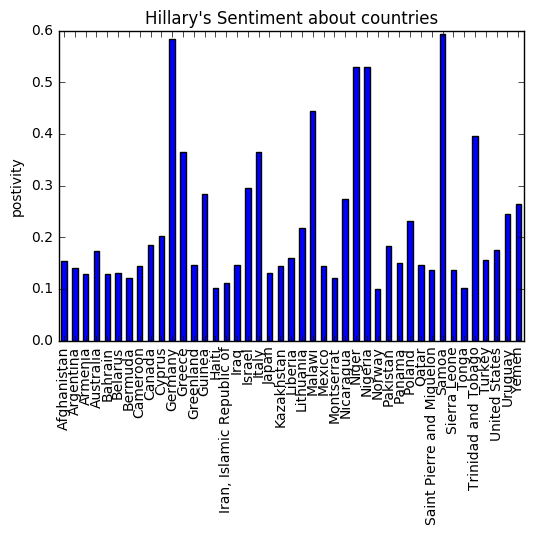

In [58]:
senti_pos = np.array([i[0] for i in senti])
df = pd.DataFrame(senti_pos,country_names)
df = df[df[0]>0.1]
ax = df.plot(kind='bar',legend=False,title='Hillary\'s Sentiment about countries')
ax.set_ylabel('postivity')

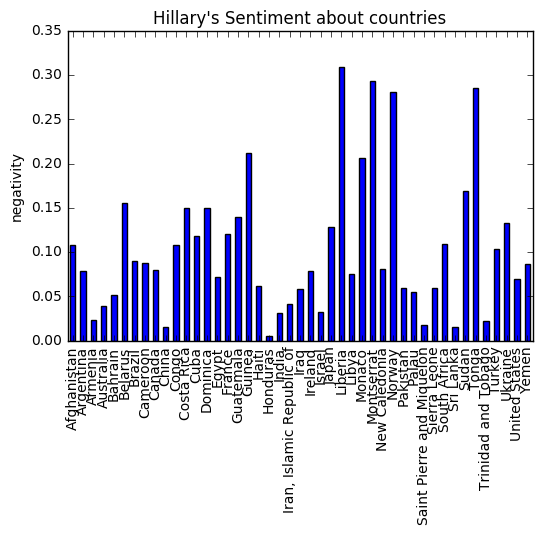

In [60]:
senti_neg = np.array([i[1] for i in senti])
df = pd.DataFrame(senti_neg,country_names)
df = df[df[0]>0]
ax = df.plot(kind='bar',legend=False,title='Hillary\'s Sentiment about countries')
ax.set_ylabel('negativity')